# 加载数据

Xgboost可以加载多种数据格式的训练数据：
libsvm 格式的文本数据；
 
Numpy 的二维数组；
 
XGBoost 的二进制的缓存文件。加载的数据存储在对象 DMatrix 中。

In [2]:
import xgboost as xgb
import numpy as np
import pandas as od

In [3]:
data = np.random.rand(5,10)                 # 5行10列数据集
label = np.random.randint(2,size=5)       # 二分类目标值
dtrain = xgb.DMatrix(data,label=label)    # 组成训练集

In [4]:
print(dtrain.get_label())

[0. 0. 0. 0. 0.]


In [5]:
#处理缺失值
drain=xgb.DMatrix(data,label=label,missing=-999)

In [6]:
#设置权重
w = np.random.rand(5,1)
dtrain = xgb.DMatrix( data, label=label, missing = -999.0, weight=w)

# Xgboost的模型参数

　在运行Xgboost之前，必须设置三种类型成熟：general parameters，booster parameters和task parameters：

　　通用参数（General Parameters）：该参数控制在提升（boosting）过程中使用哪种booster，常用的booster有树模型（tree）和线性模型（linear model）

　　Booster参数（Booster Parameters）：这取决于使用哪种booster

　　学习目标参数（Task Parameters）：控制学习的场景，例如在回归问题中会使用不同的参数控制排序

### 通用参数

### tree booster参数

### Linear Booster参数

### 学习目标参数

# Xgboost基本方法和默认参数

xgboost.train(params,dtrain,num_boost_round=10,evals(),obj=None,
feval=None,maximize=False,early_stopping_rounds=None,evals_result=None,
verbose_eval=True,learning_rates=None,xgb_model=None)

parms：这是一个字典，里面包含着训练中的参数关键字和对应的值，形式是parms = {'booster':'gbtree','eta':0.1}

　　dtrain：训练的数据

　　num_boost_round：这是指提升迭代的个数

　　evals：这是一个列表，用于对训练过程中进行评估列表中的元素。形式是evals = [(dtrain,'train'),(dval,'val')] 或者是 evals =[(dtrain,'train')] ，对于第一种情况，它使得我们可以在训练过程中观察验证集的效果。

　　obj ：自定义目的函数

　　feval：自定义评估函数

　　maximize：是否对评估函数进行最大化

　　early_stopping_rounds：早起停止次数，假设为100，验证集的误差迭代到一定程度在100次内不能再继续降低，就停止迭代。这要求evals里至少有一个元素，如果有多个，按照最后一个去执行。返回的是最后的迭代次数（不是最好的）。如果early_stopping_rounds存在，则模型会生成三个属性，bst.best_score ,bst.best_iteration和bst.best_ntree_limit

　　evals_result：字典，存储在watchlist中的元素的评估结果

　　verbose_eval（可以输入布尔型或者数值型）：也要求evals里至少有一个元素，如果为True，则对evals中元素的评估结果会输出在结果中；如果输入数字，假设为5，则每隔5个迭代输出一次。

　　learning_rates：每一次提升的学习率的列表

　　xgb_model：在训练之前用于加载的xgb_model

# xgboost实战

基于Xgboost原生接口的分类

In [29]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
iris=load_iris()
iris.data.shape

(150, 4)

In [31]:
x,y=iris.data,iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

accuarcy:100.00%


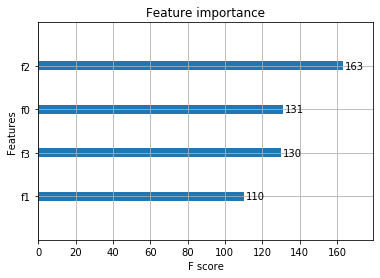

In [32]:
params = {
    'booster':'gbtree',
    'objective':'multi:softmax',
    'num_class':3,
    'gamma':0.1,
    'max_depth':6,
    'lambda':2,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'slient':1,
    'eta':0.1,
    'seed':1000,
    'nthread':4,
}
plst=params.items()
dtrain=xgb.DMatrix(x_train,y_train)
num_rounds=500
model=xgb.train(plst,dtrain,num_rounds)
dtest=xgb.DMatrix(x_test)
y_pred=model.predict(dtest)
accuracy=accuracy_score(y_test,y_pred)
print("accuarcy:%.2f%%"%(accuracy*100))
plot_importance(model)
plt.show()

In [33]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error


In [34]:
boston=load_boston()
x,y=boston.data,boston.target

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
params = {
    'booster':'gbtree',
    'objective':'reg:gamma',
    'gamma':0.1,
    'max_depth':5,
    'lambda':3,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'slient':1,
    'eta':0.1,
    'seed':1000,
    'nthread':4,
}

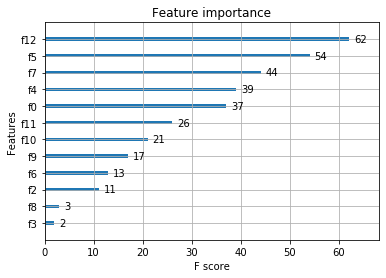

In [37]:
dtrain=xgb.DMatrix(x_train,y_train)
num_rounds=300
plst=params.items()
model=xgb.train(plst,dtrain,num_rounds)
dtest=xgb.DMatrix(x_test)
ans=model.predict(dtest)
plot_importance(model)
plt.show()

In [41]:
print(mean_squared_error(y_test,ans))

19.49089321562808


### Xgboost使用sklearn接口的分类（推荐）

In [64]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [65]:
iris=load_iris()
x,y=iris.data,iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)

In [66]:
params={'n_n_estimators':np.arange(50,300,10)}
model=xgb.XGBClassifier(max_depth=5,learning_rate=0.1,silent=True)
gsv=GridSearchCV(model,param_grid=params)
gsv.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 28

In [67]:
print(gsv.best_params_)

{'n_n_estimators': 50}


In [68]:
model=xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=50,silent=True)


In [69]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [70]:
y_pred=model.predict(x_test)


In [71]:
accuracy=accuracy_score(y_test,y_pred)
print('accuracy:%2.f%%'%(accuracy*100))

accuracy:96%


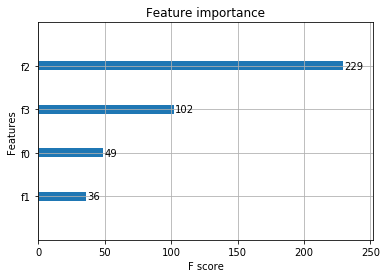

In [72]:
plot_importance(model)
plt.show()

### 基于Scikit-learn接口的回归

In [80]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [81]:
boston=load_boston()
x,y=boston.data,boston.target


In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)

In [87]:
model=xgb.XGBRegressor(max_depth=5,n_estimators=50,learning_rate=0.1,silent=True,objective='reg:gamma')

In [88]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:gamma', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [89]:
ans=model.predict(x_test)

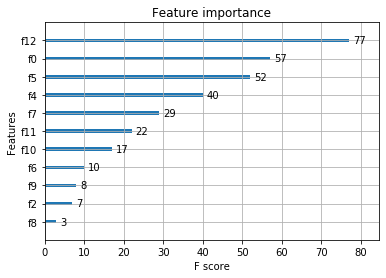

In [90]:
plot_importance(model)
plt.show()

In [91]:
print(mean_squared_error(y_test,ans))

62.8490430051743


# Xgboost参数调优的一般方法

第二步：max_depth和min_weight参数调优
　　我们先对这两个参数调优，是因为他们对最终结果有很大的影响。首先，我们先大范围地粗略参数，然后再小范围的微调。

　　注意：在这一节我会进行高负荷的栅格搜索（grid search），这个过程大约需要15-30分钟甚至更久，具体取决于你系统的性能，你也可以根据自己系统的性能选择不同的值。

　　网格搜索scoring = 'roc_auc' 只支持二分类，多分类需要修改scoring（默认支持多分类）

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
#param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
from sklearn import svm, grid_search, datasets
from sklearn import grid_search
gsearch1 = grid_search.GridSearchCV(
estimator = XGBClassifier(
learning_rate =0.1,
n_estimators=140, max_depth=5,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27),
param_grid = param_test1,
scoring='roc_auc',
n_jobs=4,
iid=False,
cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_,gsearch1.best_score_
#网格搜索scoring='roc_auc'只支持二分类，多分类需要修改scoring(默认支持多分类)

在已经调整好其他参数的基础上，我们可以进行gamma参数的调优了。Gamma参数取值范围很大，这里我们设置为5，其实你也可以取更精确的gamma值。

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
 
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1,
 n_estimators=140, max_depth=4,min_child_weight=6, gamma=0,
subsample=0.8, colsample_bytree=0.8,objective= 'binary:logistic',
nthread=4, scale_pos_weight=1,seed=27),  param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
 
gsearch3.fit(train[predictors],train[target])
 
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

调整subsample 和 colsample_bytree参数
尝试不同的subsample 和 colsample_bytree 参数。我们分两个阶段来进行这个步骤。这两个步骤都取0.6,0.7,0.8,0.9作为起始值。

In [ ]:
#取0.6,0.7,0.8,0.9作为起始值
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
  
gsearch4 = GridSearchCV(
estimator = XGBClassifier(
learning_rate =0.1,
n_estimators=177,
max_depth=3,
min_child_weight=4,
gamma=0.1,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27),
param_grid = param_test4,
scoring='roc_auc',
n_jobs=4,
iid=False,
cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

# XGBoost输出特征重要性以及筛选特征

　使用梯度提升算法的好处是在提升树被创建后，可以相对直接地得到每个属性的重要性得分。一般来说，重要性分数，衡量了特征在模型中的提升决策树构建中的价值。一个属性越多的被用来在模型中构建决策树，它的重要性就相对越高。

　　属性重要性是通过对数据集中的每个属性进行计算，并进行排序得到。在单个决策树中通过每个属性分裂点改进性能度量的量来计算属性重要性。由节点负责加权和记录次数，也就是说一个属性对分裂点改进性能度量越大（越靠近根节点），权值越大；被越多提升树所选择，属性越重要。性能度量可以是选择分裂节点的Gini纯度，也可以是其他度量函数。

　　最终将一个属性在所有提升树中的结果进行加权求和后然后平均，得到重要性得分。

绘制特征重要性

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.01251974 0.03348068 0.5958339  0.35816565]


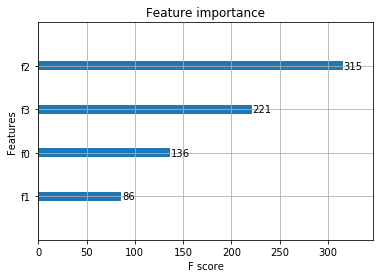

In [94]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.datasets import load_iris
from xgboost import plot_importance
 
# load data
dataset = load_iris()
print(iris.feature_names)
# split data into X and y
X = dataset.data
y = dataset.target
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot feature importance

plot_importance(model)
pyplot.show()

In [96]:

import numpy as np
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.datasets import load_iris
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
 
# load data
dataset = load_iris()
# split data into X and y
X = dataset.data
y = dataset.target
 
# split data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7)
 
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)
 
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:%.2f%%"%(accuracy*100.0))
 
#fit model using each importance as a threshold
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model,threshold=thresh,prefit=True )
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test,predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))

[0.01590523 0.13336425 0.4745309  0.37619963]
Accuracy:92.00%
Thresh=0.016, n=4, Accuracy: 92.00%
Thresh=0.133, n=3, Accuracy: 92.00%
Thresh=0.376, n=2, Accuracy: 94.00%
Thresh=0.475, n=1, Accuracy: 90.00%
